<a href="https://colab.research.google.com/github/AbrarKarim01/Human-Activity-Recognition/blob/main/AI_for_Human_Activition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from scipy.stats import zscore
from sklearn.pipeline import Pipeline

## Dataset Import

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
train_frame = pd.read_csv('/content/gdrive/MyDrive/COMP-5011/Human Activity Recognition/AI for Human Activity Recognition/train.csv')
test_frame = pd.read_csv('/content/gdrive/MyDrive/COMP-5011/Human Activity Recognition/AI for Human Activity Recognition/test.csv')

Mounted at /content/gdrive


## Dataset Description

In [3]:
train_frame.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
0,0.282693,-0.114218,-0.148965,-0.990423,-0.678221,-0.784716,-0.991686,-0.631091,-0.773290,-0.926707,...,0.440097,0.226469,0.039784,0.056157,0.248543,-0.009400,-0.897382,0.033979,0.057000,1
1,0.291258,-0.005800,-0.131349,-0.218987,-0.022395,-0.294607,-0.256992,-0.060400,-0.314925,0.181927,...,-0.140728,-0.553559,-0.131728,-0.686828,-0.811976,0.747026,-0.697878,0.283321,0.116030,3
2,0.293854,-0.018395,-0.105433,-0.934063,-0.971529,-0.971504,-0.932931,-0.967659,-0.968882,-0.885246,...,-0.503366,-0.818465,-0.120891,-0.543095,0.388610,0.245138,0.546330,-0.233630,-0.782192,0
3,0.280052,-0.017095,-0.106500,-0.997276,-0.993831,-0.985171,-0.997468,-0.993838,-0.984146,-0.939488,...,-0.483813,-0.805579,-0.332320,0.257233,0.539555,-0.521196,-0.765691,0.212618,0.136552,2
4,0.274166,-0.014211,-0.097595,-0.996605,-0.988267,-0.989766,-0.997116,-0.987485,-0.989674,-0.940101,...,-0.608883,-0.897440,0.050271,0.256353,-0.070866,-0.310026,-0.877299,0.030679,-0.040969,1


In [4]:
test_frame.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.199635,0.005512,-0.068680,0.009620,-0.126713,0.124024,-0.097453,-0.196435,0.081502,0.466573,...,0.232297,-0.424333,-0.789447,0.658158,0.329510,0.866157,0.083916,-0.676997,0.162649,0.240615
1,0.281553,-0.012878,-0.109167,-0.994711,-0.982852,-0.992647,-0.995089,-0.983604,-0.992100,-0.937069,...,0.131622,-0.675375,-0.925821,0.066405,0.232656,0.001946,-0.077727,0.757830,0.212203,0.992766
2,0.279227,-0.016573,-0.108964,-0.979357,-0.971330,-0.987769,-0.980978,-0.974661,-0.986824,-0.918098,...,0.080906,-0.254875,-0.640857,-0.078458,-0.236258,-0.579898,0.362077,0.751585,-0.568532,-0.417022
3,0.280310,-0.017599,-0.105466,-0.993903,-0.995501,-0.995637,-0.994348,-0.994759,-0.995433,-0.937418,...,0.552287,-0.680190,-0.927873,-0.196500,-0.205238,0.463971,-0.555357,0.481105,-0.609583,-0.383527
4,0.273832,-0.014089,-0.108347,-0.995199,-0.984949,-0.982538,-0.995658,-0.984462,-0.983558,-0.942354,...,0.597269,-0.674631,-0.920273,0.111135,0.353982,0.026525,-0.056642,-0.487248,-0.076741,-0.298376


In [5]:
train_frame.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
count,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,...,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
mean,0.276437,-0.016269,-0.107338,-0.676245,-0.603374,-0.688416,-0.695007,-0.618923,-0.691743,-0.554677,...,-0.298991,-0.616763,0.005538,0.001724,0.034711,-0.012502,-0.460549,0.019174,-0.090602,1.687226
std,0.068676,0.036846,0.055566,0.448357,0.485946,0.387786,0.425801,0.465856,0.379338,0.542308,...,0.328721,0.313847,0.320096,0.419428,0.551550,0.465033,0.549105,0.304555,0.285809,1.166682
min,-1.000000,-0.684893,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143,0.000000
25%,0.268608,-0.022700,-0.118621,-0.994091,-0.982202,-0.983500,-0.994766,-0.982119,-0.983352,-0.937926,...,-0.542199,-0.844283,-0.099869,-0.249278,-0.372991,-0.371051,-0.824408,-0.111308,-0.194375,1.000000
50%,0.277315,-0.017095,-0.108376,-0.973723,-0.937450,-0.944359,-0.977155,-0.939151,-0.944633,-0.916190,...,-0.332757,-0.702497,0.009020,0.006777,0.027985,-0.004213,-0.732575,0.156128,-0.025254,2.000000
75%,0.285747,-0.011674,-0.099305,-0.329447,-0.118671,-0.355979,-0.367156,-0.148255,-0.360757,-0.117149,...,-0.108228,-0.484392,0.121266,0.250405,0.456004,0.335997,-0.383165,0.228101,0.089048,3.000000
max,1.000000,0.594513,1.000000,1.000000,0.916238,0.931308,1.000000,0.967664,0.800252,1.000000,...,0.989538,0.956845,1.000000,0.997688,0.994519,0.996078,1.000000,0.478157,1.000000,3.000000


In [6]:
test_frame.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.277125,-0.016912,-0.105630,-0.687809,-0.608781,-0.693850,-0.706655,-0.623350,-0.695550,-0.565834,...,0.134919,-0.283583,-0.600291,-0.001360,0.005335,0.053265,-0.024799,-0.465396,0.015799,-0.070793
std,0.063487,0.060607,0.055560,0.436674,0.481970,0.381884,0.413831,0.462959,0.376858,0.528123,...,0.259107,0.341061,0.339263,0.328714,0.425245,0.543028,0.460717,0.543574,0.319541,0.280156
min,-0.278574,-1.000000,-0.560934,-0.999850,-0.997616,-0.998689,-0.999798,-0.997092,-0.999661,-0.955069,...,-0.707489,-0.902791,-0.984028,-0.942680,-0.966811,-0.996121,-0.965561,-0.996405,-0.981803,-1.000000
25%,0.270396,-0.021834,-0.116750,-0.994064,-0.982581,-0.982310,-0.994826,-0.982438,-0.982065,-0.937820,...,-0.013968,-0.540701,-0.847741,-0.129121,-0.271736,-0.345089,-0.383338,-0.822766,-0.111390,-0.174834
50%,0.277964,-0.017164,-0.108888,-0.978267,-0.937322,-0.942297,-0.981002,-0.942555,-0.943348,-0.918213,...,0.147893,-0.319816,-0.701431,-0.001715,0.013094,0.036610,-0.006949,-0.719796,0.151846,-0.030175
75%,0.286054,-0.012172,-0.098918,-0.349457,-0.126481,-0.380625,-0.396634,-0.155176,-0.383729,-0.137897,...,0.303955,-0.095213,-0.468839,0.108066,0.261978,0.447528,0.319317,-0.457181,0.230465,0.087486
max,0.533480,0.646747,0.719094,0.853317,0.696598,0.485609,0.876859,0.585983,0.469882,0.748574,...,0.860512,0.941113,0.894210,0.946651,0.998425,0.994476,0.979522,0.933936,0.437536,0.999776


## Shape of the Data

In [7]:
print(train_frame.shape)
print("\n")
print(test_frame.shape)

(5707, 562)


(500, 561)


## Duplicates and Null Values

In [8]:
print('Duplicates in dataset: {}'.format(sum(train_frame.duplicated())))
print('Duplicates in dataset: {}'.format(sum(test_frame.duplicated())))

print('Null values in dataset: {}'.format(train_frame.isnull().values.sum()))
print('Null values in dataset: {}'.format(test_frame.isnull().values.sum()))

Duplicates in dataset: 0
Duplicates in dataset: 0
Null values in dataset: 0
Null values in dataset: 0


## Data Visualization

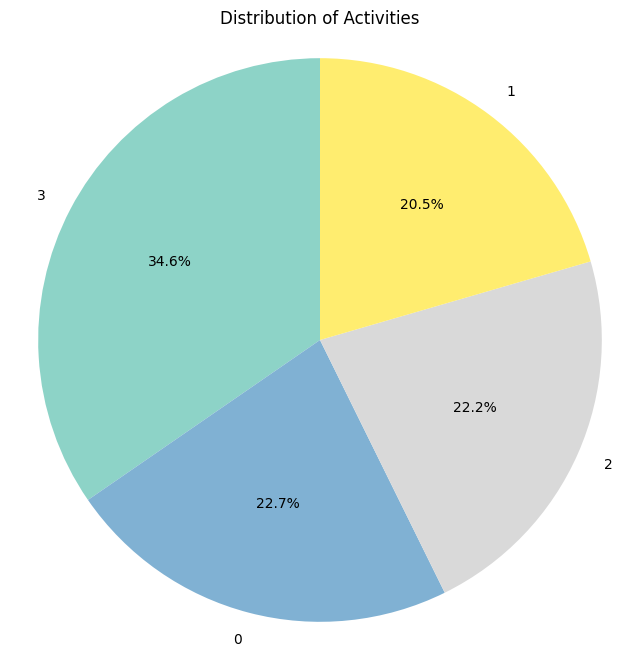

In [17]:
activity_percentiles = train_frame['label'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))

custom_palette = plt.get_cmap('Set3')

num_activities = len(activity_percentiles)
colors = custom_palette(np.linspace(0, 1, num_activities))

plt.pie(activity_percentiles, labels=activity_percentiles.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Activities')
plt.axis('equal')
plt.show()

## Model Training

In [10]:
input = train_frame.values
target = train_frame.label.values

In [12]:
X = train_frame.drop(columns=['label']).values  # Drop the label column
y = train_frame['label'].values  # Extract the label column

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)

In [14]:
test_inputs = test_frame.values

In [15]:
def train_test_pipe(sklearn_model) -> np.array:

    sklearn_model.fit(X_train, y_train)  # Fit the model
    y_val_preds = sklearn_model.predict(X_val)

    # Ensure shapes match
    assert y_val_preds.shape[0] == y_val.shape[0]

    print(f"Validation Accuracy : {accuracy_score(y_val, y_val_preds)}")
    test_preds = sklearn_model.predict(test_inputs)  # Predict on the actual test dataset
    return test_preds

# Train and get predictions
dtree_preds = train_test_pipe(DecisionTreeClassifier())
svm_classifier = train_test_pipe(SVC(kernel='rbf', C=100))
xgboost_preds = train_test_pipe(xgb.XGBClassifier(objective='multi:softmax', num_class=6, random_state=42))


Validation Accuracy : 0.9597197898423818
Validation Accuracy : 0.9824868651488616
Validation Accuracy : 0.9947460595446584


## Submission

In [51]:
submission_map = {"id_test_data": list(range(1, len(xgboost_preds) + 1)), "label":  xgboost_preds.tolist()}
submission_frame = pd.DataFrame.from_dict(submission_map)
print(submission_frame.head())
submission_frame.to_csv("Md Abrar Karim-AI for Human Activity Recognition.csv", index=False)

   id_test_data  label
0             1      3
1             2      0
2             3      0
3             4      0
4             5      1
